In [1]:
# at the moment, best way to extract some features and evaluate them
# is using AlignedFeatureData class
from pystoms.aligned_feature_data import AlignedFeatureData
# import a model
from pystoms.models_3d.model_3d_m1 import ModelM1
# Data handling is done by proteolizarddata (https://github.com/theGreatHerrLebert/proteolizard-data)
from proteolizarddata.data import PyTimsDataHandleDDA
# for generating random feature ids
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
random_seed = 2022
rng = np.random.default_rng(random_seed)

2022-09-22 14:10:32.010819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 14:10:32.107930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 14:10:32.107947: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 14:10:32.135134: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-22 14:10:32.614921: W tensorflow/stream_executor/platform/de

In [2]:
# get data
data_path = "/home/tim/Workspaces/MassSpecDaten/M210115_001_Slot1-1_1_850.d/"
data_handle = PyTimsDataHandleDDA(data_path)

In [3]:
total_features = 1
feature_ids = np.random.randint(1000,4001,size=total_features)

In [4]:
aligned_features = AlignedFeatureData(
                            data_handle,
                            ids=feature_ids,
                            is_parallel=False)

In [5]:
# create model
model = ModelM1(aligned_features,random_number_generator=rng)


In [6]:
# no the model can be sampled
sample_trace = model.evaluation()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [i_t, i_s, ms_mz, ms_s, alpha, me]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 51 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5815, but should be close to 0.8. Try to increase the number of tuning steps.
There were 400 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.383, but should be close to 0.8. Try to increase the number of tuning steps.


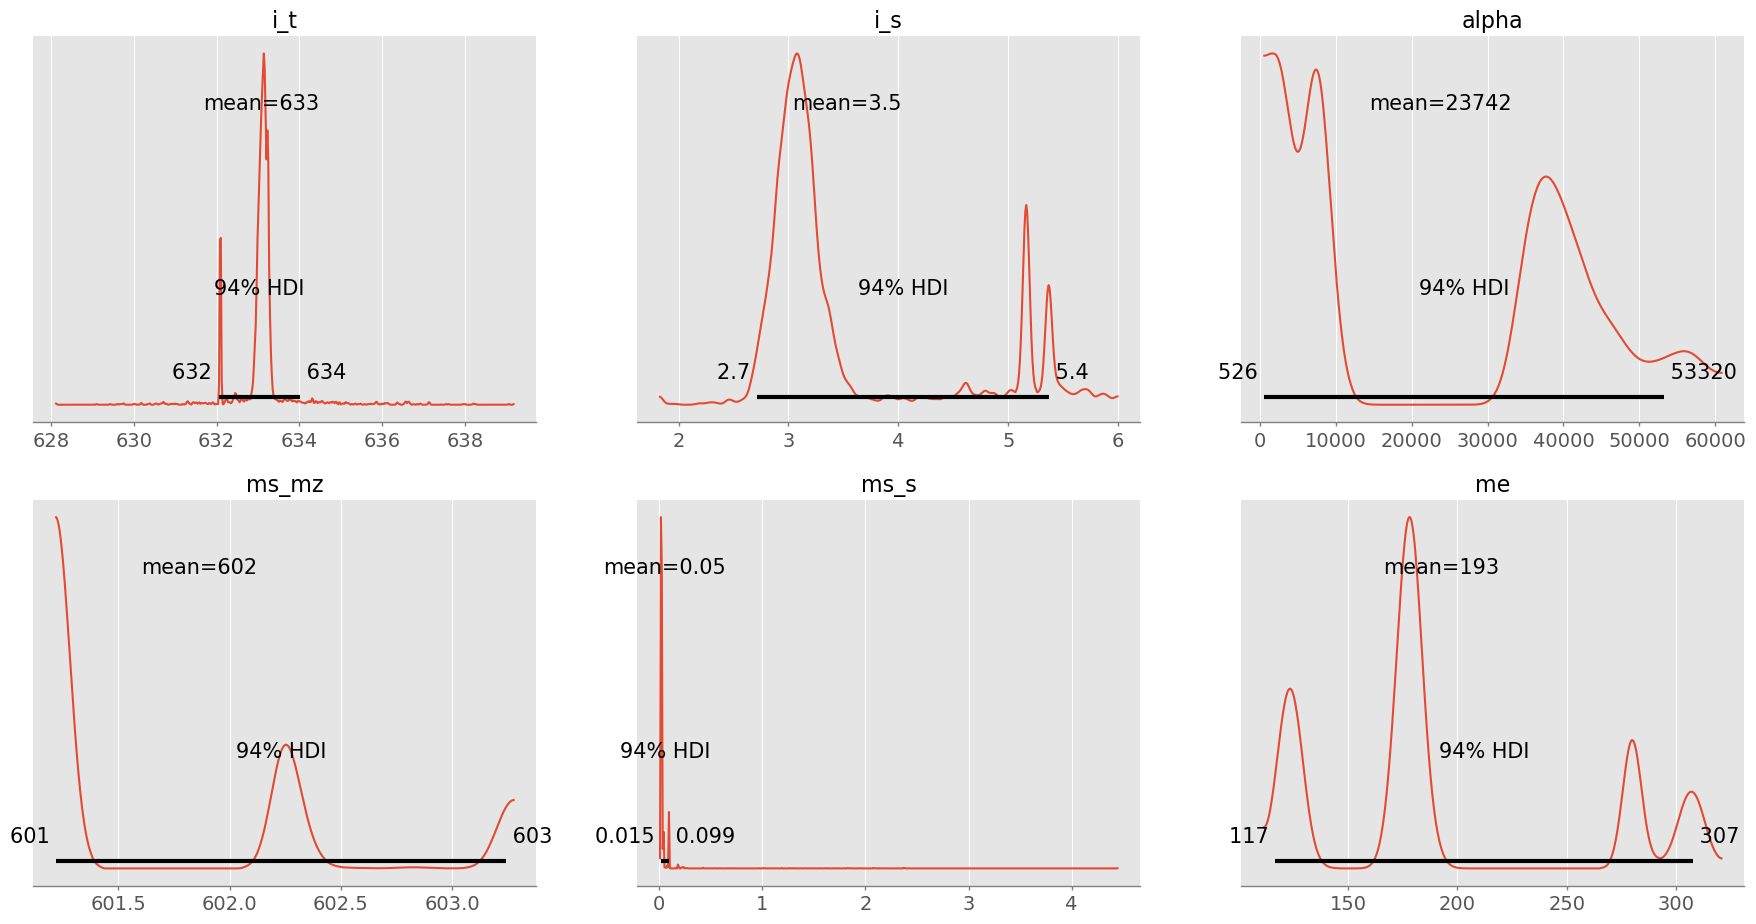

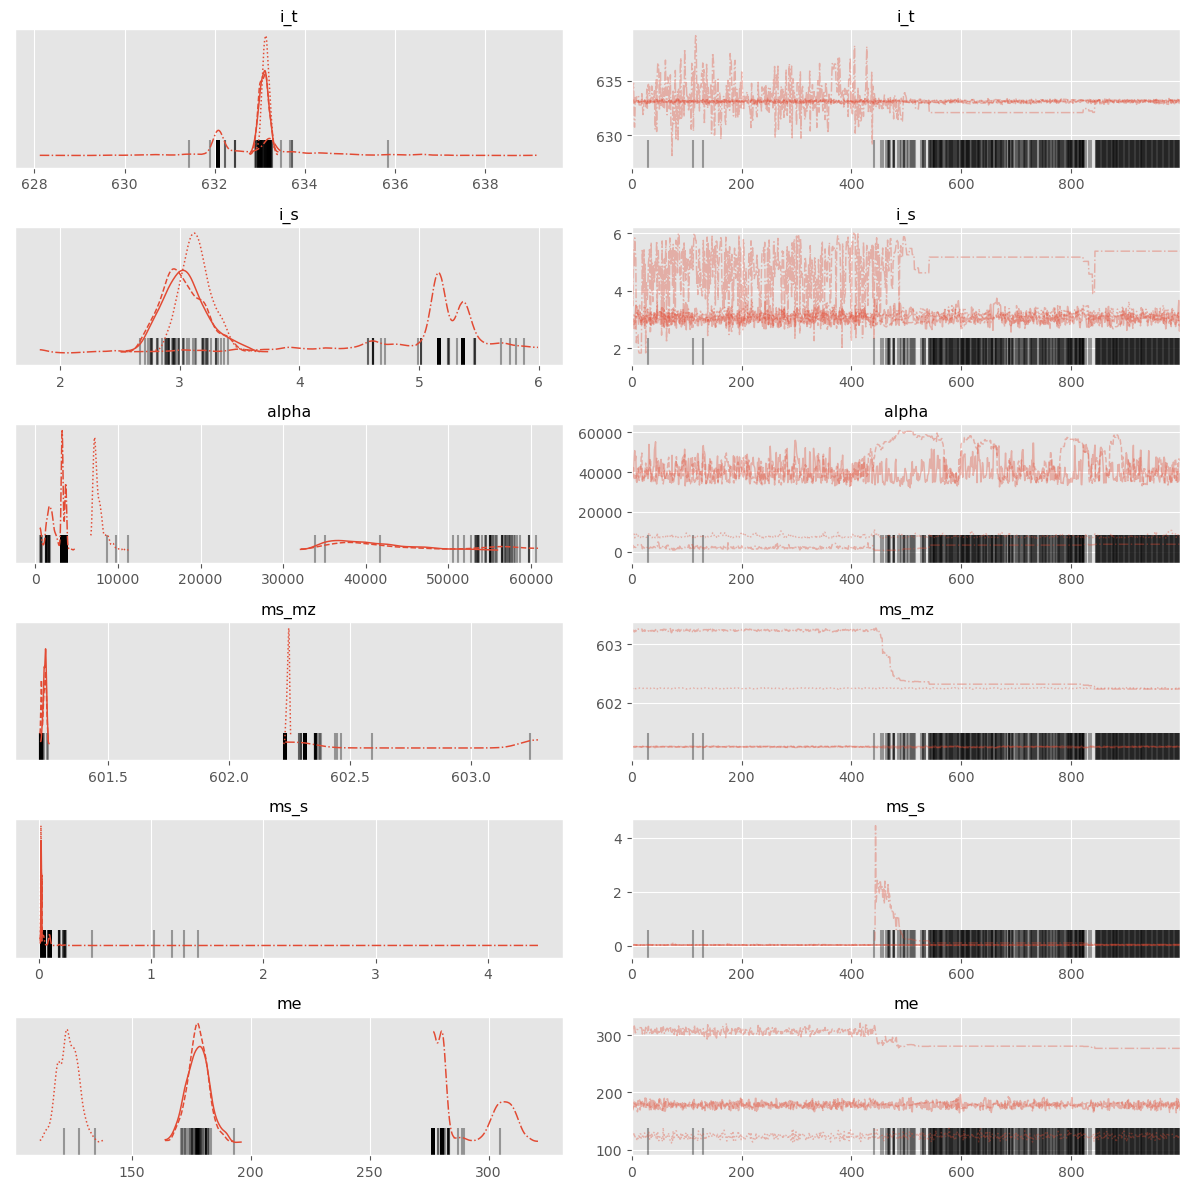

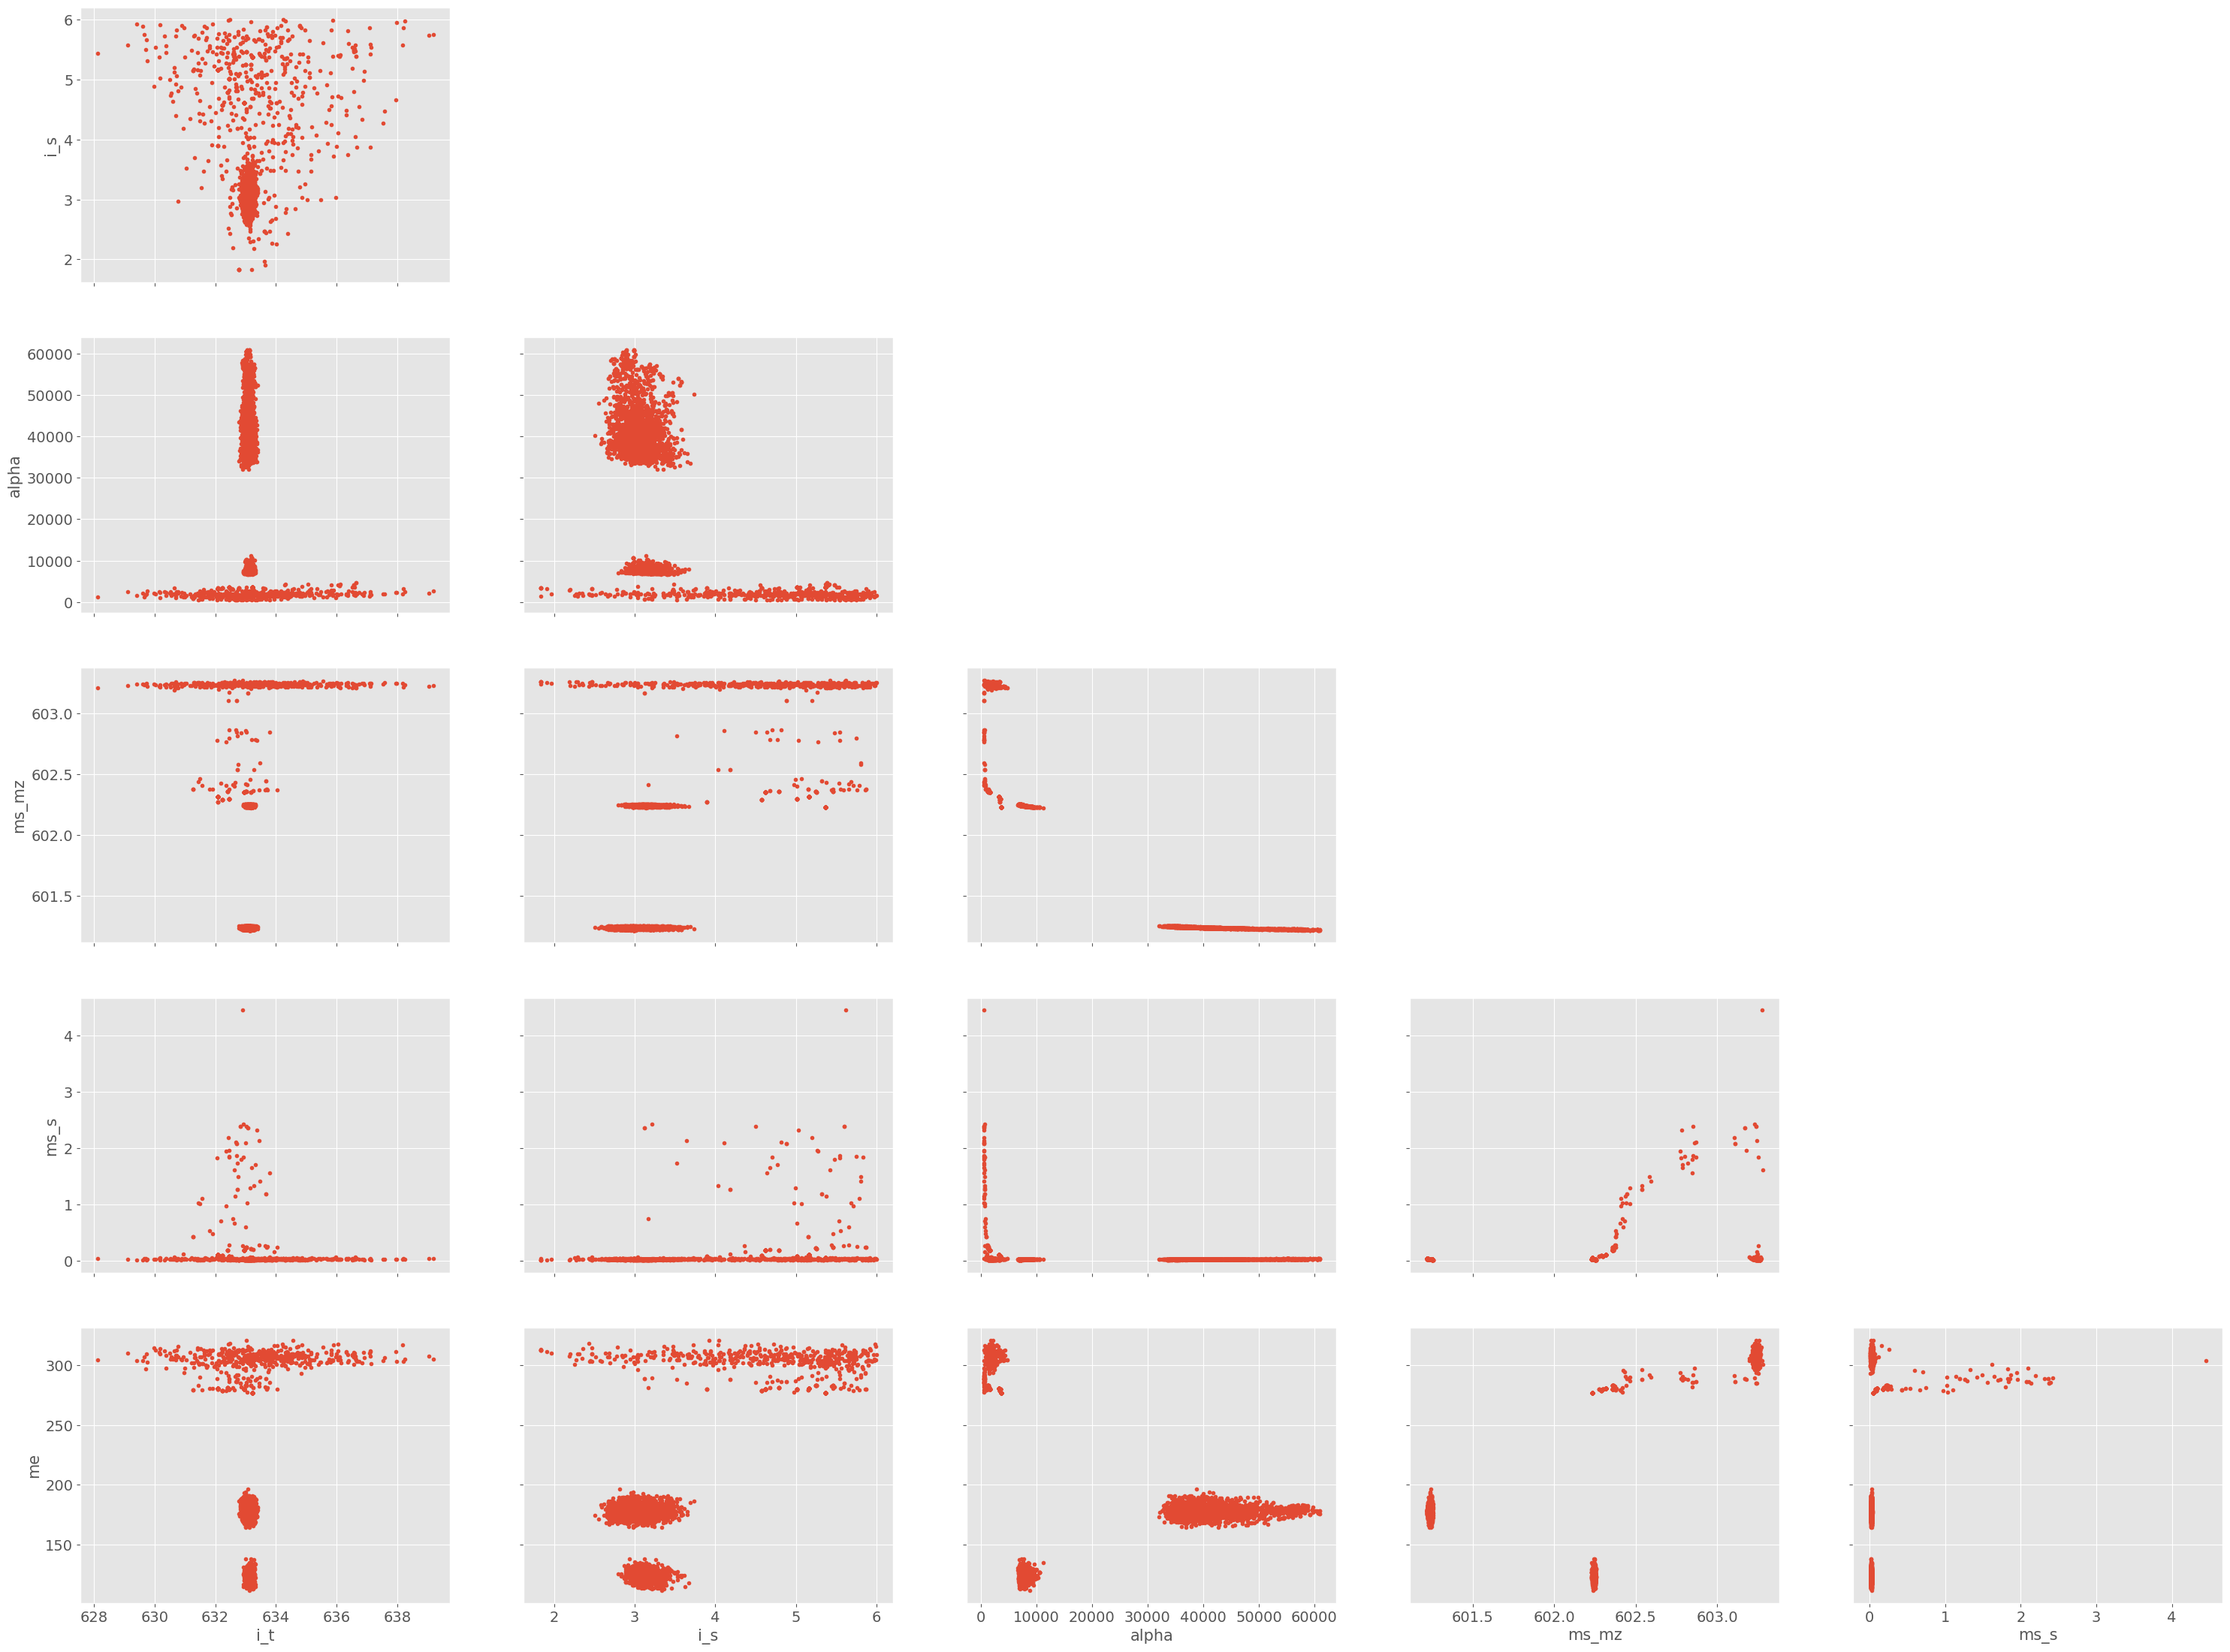

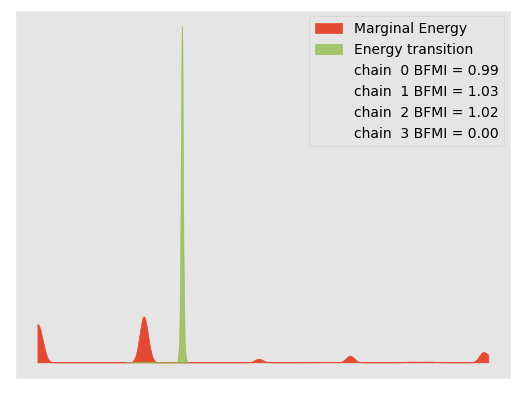

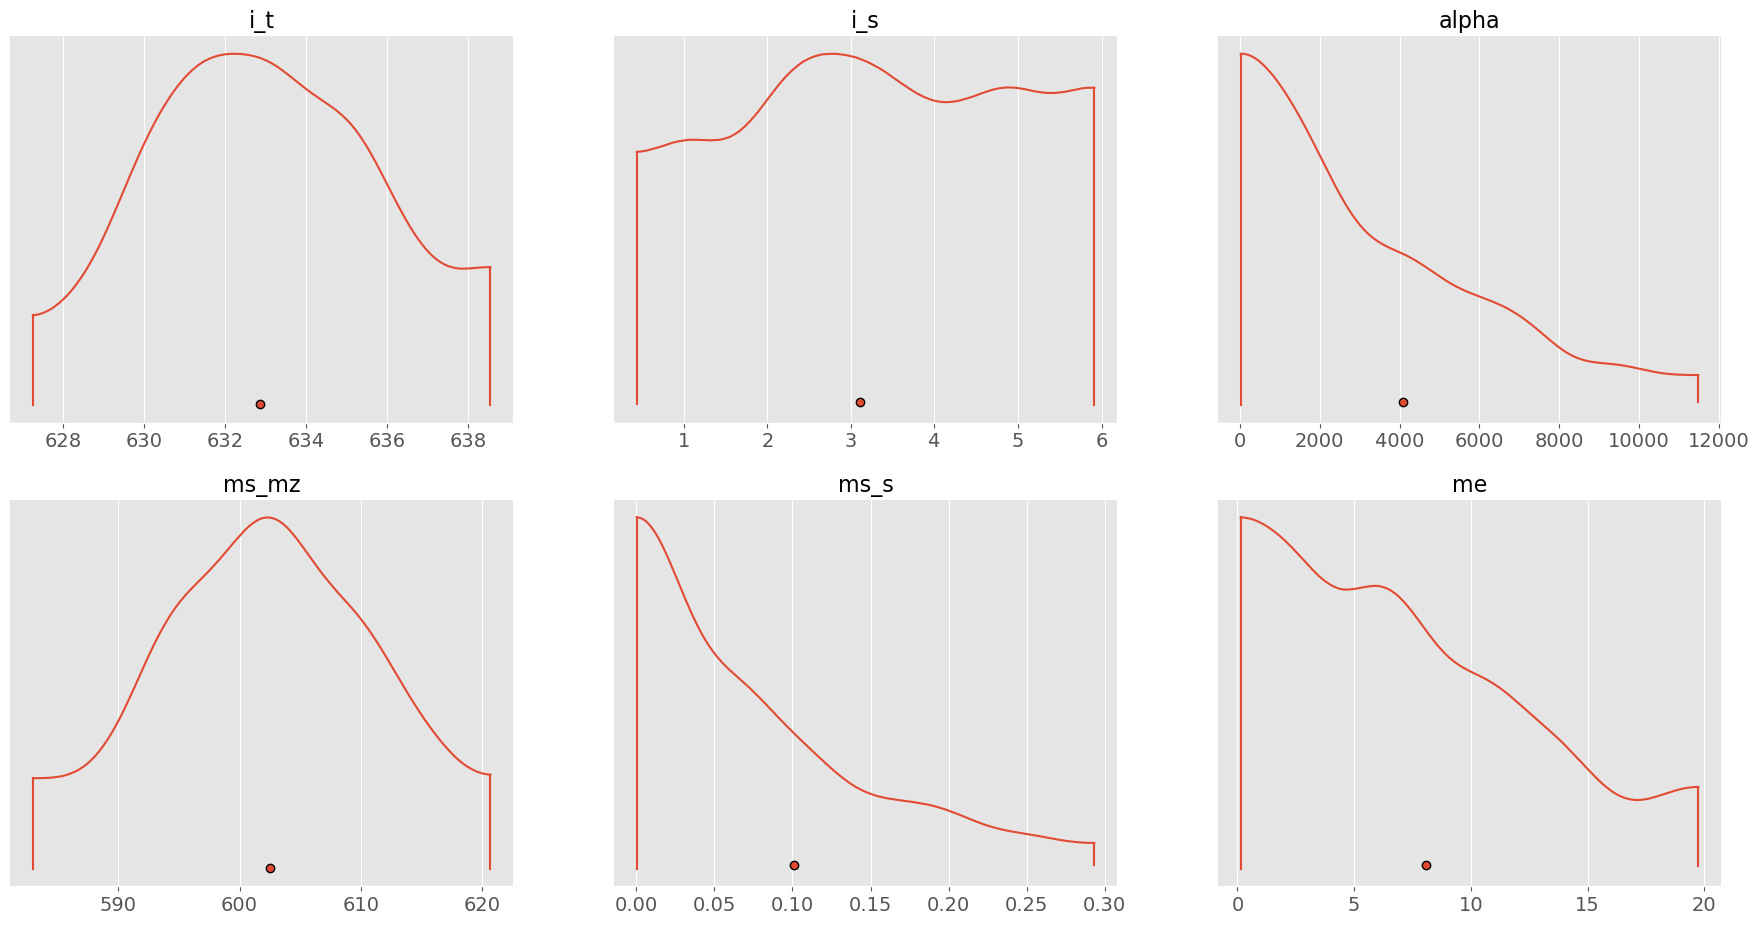

In [7]:
model.arviz_plots(save_fig=False)